По желанию(scipy):
f(x) = -12x^4*sin(cos(x)) - 18x^3+5x^2 + 10x - 30

In [14]:
import sympy
import scipy
from sympy.plotting import plot
init_printing()

In [5]:
x = Symbol('x')

In [6]:
f = -12*x**4*sin(cos(x)) - 18*x**3+5*x**2 + 10*x - 30

# График

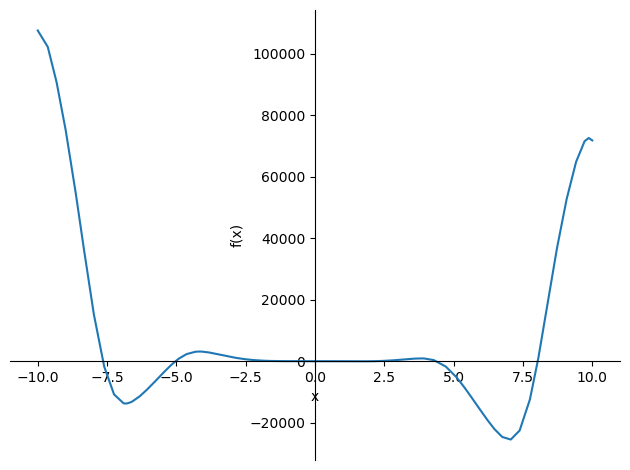

In [7]:
plot(f)

# Корни уравнения

In [15]:
f_np = sympy.lambdify(x, '-12*x**4*sin(cos(x)) - 18*x**3+5*x**2 + 10*x - 30', modules=['numpy'])
zeros = []
solution = scipy.optimize.fsolve(f_np, -8)
zeros.append(solution[0])
solution = scipy.optimize.fsolve(f_np, -5)
zeros.append(solution[0])
solution = scipy.optimize.fsolve(f_np, [-2.5, 2.5])
zeros.append(solution[0])
solution = scipy.optimize.fsolve(f_np, 5)
zeros.append(solution[0])
solution = scipy.optimize.fsolve(f_np, 7.5)
zeros.append(solution[0])
zeros.sort()
for i in zeros:
    print(i)



-7.650622285132756
-5.026865928206214
-1.3389666392771225
4.38352369796896
8.035164133413524


# Производная

In [17]:
f_diff = sympy.diff(f)
print(f_diff)

12*x**4*sin(x)*cos(cos(x)) - 48*x**3*sin(cos(x)) - 54*x**2 + 10*x + 10


# Вершины

In [20]:
find_extr = sympy.lambdify(x, f_diff, modules=['numpy'])
extr = []
solution = scipy.optimize.fsolve(find_extr, -10)
extr.append(solution[0])
solution = scipy.optimize.fsolve(find_extr, -7.5)
extr.append(solution[0])
solution = scipy.optimize.fsolve(find_extr, -5)
extr.append(solution[0])
solution = scipy.optimize.fsolve(find_extr, -2.5)
extr.append(solution[0])
solution = scipy.optimize.fsolve(find_extr, 2.5)
extr.append(solution[0])
solution = scipy.optimize.fsolve(find_extr, 5)
extr.append(solution[0])
solution = scipy.optimize.fsolve(find_extr, 7.5)
extr.append(solution[0])
solution = scipy.optimize.fsolve(find_extr, 10)
extr.append(solution[0])
extr.sort()
for i in extr:
    print(i)

-9.9789537610151
-6.831370040000853
-4.167783523850484
-0.3926771799327562
1.700607277951215
3.8193108333822843
7.001031658541252
9.877149053972511


# Интервалы, на которых f(x) больше и меньше 0

In [23]:
def greater_less(function, roots):
    gaps = []
    for i in range(len(roots)-1):
        sol = function.evalf(subs={x:(roots[i+1] + roots[i])/2})
        if sol > 0:
            gaps.append(f'({roots[i]},{roots[i+1]}) - > 0')
        elif sol < 0:
            gaps.append(f'({roots[i]},{roots[i+1]}) - < 0')
    if '> 0' in gaps[0]:
        gaps.insert(0,f'(-бесконечность, {roots[0]}) - < 0')
    else:
        gaps.insert(0,f'(-бесконечность, {roots[0]}) - > 0')
    if '> 0' in gaps[len(gaps)-1]:
        gaps.append(f'({roots[len(roots)-1]}, +бесконечность ) - < 0')
    else:
        gaps.append(f'({roots[len(roots)-1]}, +бесконечность ) - > 0')
    return gaps
great_less_gaps = greater_less(f, zeros)
for i in great_less_gaps:
    print(i)
        

(-бесконечность, -7.650622285132756) - > 0
(-7.650622285132756,-5.026865928206214) - < 0
(-5.026865928206214,-1.3389666392771225) - > 0
(-1.3389666392771225,4.38352369796896) - < 0
(4.38352369796896,8.035164133413524) - < 0
(8.035164133413524, +бесконечность ) - > 0


# Промежутки возрастания и убывания

In [25]:
def up_down(function, roots):
    gaps = []
    for i in range(len(roots)-1):
        sol = function.evalf(subs={x:(roots[i+1] + roots[i])/2})
        if sol > 0:
            gaps.append(f'({roots[i]},{roots[i+1]}) - возрастание')
        elif sol < 0:
            gaps.append(f'({roots[i]},{roots[i+1]}) - убывание')
    if 'возрастание' in gaps[0]:
        gaps.insert(0,f'(-бесконечность, {roots[0]}) - убывание')
    else:
        gaps.insert(0,f'(-бесконечность, {roots[0]}) - возрастание')
        
    if 'возрастание' in gaps[len(gaps)-1]:
        gaps.append(f'({roots[len(roots)-1]}, +бесконечность ) - убывание')
    else:
        gaps.append(f'({roots[len(roots)-1]}, +бесконечность ) - возрастание')
    return gaps
mon_gaps = up_down(f_diff, extr)
for i in mon_gaps:
    print(i)
        

(-бесконечность, -9.9789537610151) - возрастание
(-9.9789537610151,-6.831370040000853) - убывание
(-6.831370040000853,-4.167783523850484) - возрастание
(-4.167783523850484,-0.3926771799327562) - убывание
(-0.3926771799327562,1.700607277951215) - убывание
(1.700607277951215,3.8193108333822843) - возрастание
(3.8193108333822843,7.001031658541252) - убывание
(7.001031658541252,9.877149053972511) - возрастание
(9.877149053972511, +бесконечность ) - убывание
